In [5]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [6]:
train= pd.read_csv('train_clean.csv')
test = pd.read_csv('data/test.csv')


In [7]:
#show all the columns 
pd.set_option('display.max_columns', None)

train.head()

,name,explicit,popularity,artists,album_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,n_beats,processing,genre,Explicit
0,Long Road,False,46,Funki Porcini,Hed Phone Sex,0.690,0.513,5,-12.529,1.0,0.0975,0.302000,0.536000,0.281,0.635,142.221,4.0,567,1.279305,j-dance,0
1,Ondskapens Galakse,False,3,Kvelertak,Nattesferd,0.363,0.854,2,-7.445,1.0,0.0397,0.000089,0.800000,0.262,0.489,116.628,4.0,652,3.700483,black-metal,0
2,Can't Look Away,False,23,The Wood Brothers,One Drop of Truth,0.523,0.585,5,-5.607,1.0,0.0765,0.066400,0.001270,0.117,0.385,140.880,4.0,619,1.279305,bluegrass,0
3,Thunderground,False,25,The Darkraver;DJ Vince,Happy Hardcore Top 100,0.643,0.687,7,-11.340,1.0,0.0539,0.000576,0.096900,0.299,0.637,143.956,4.0,733,4.067086,happy,0
4,Sick Bubblegum,True,32,Rob Zombie,Hellbilly Deluxe 2 (Standard Explicit),0.642,0.972,5,-3.047,1.0,0.0967,0.001520,0.000024,0.384,0.421,118.035,4.0,432,1.279305,industrial,1


In [8]:
#show all the columns 
pd.set_option('display.max_columns', None)
test.head()


,name,artists,album_name,genre,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,n_beats,processing,explicit
0,Untrue,Coal Chamber,Chamber Music,industrial,32,0.383,0.951,0,-3.743,1,0.1040,0.00607,0.000000,0.2610,0.668,110.584,4,385,3.349057,False
1,High Roller,The Crystal Method,Vegas,breakbeat,41,0.464,0.579,5,-9.136,1,0.0596,0.28100,0.827000,0.0992,0.140,171.752,4,935,1.279305,False
2,Na Tum Jano Na Hum (ReVibe),Ashwin Adwani,Na Tum Jano Na Hum (ReVibe),indian,40,0.611,0.778,9,-4.803,1,0.0326,0.09460,0.000005,0.1390,0.285,90.024,4,200,1.343558,False
3,いじわるなハロー,Perfume,Cling Cling,j-idol,25,0.500,0.958,0,-1.695,0,0.0350,0.00817,0.318000,0.7320,0.955,130.059,4,526,3.349057,False
4,Hit The Ceiling,Audio Bullys,Ego War,breakbeat,0,0.802,0.684,1,-8.839,1,0.1230,0.00181,0.010200,0.2360,0.637,130.022,4,440,2.367412,False


In [ ]:
#drop in test 'processing', 'popularity_confidence', and the convert duration_ms to duration_s and delete duration_ms
test = test.drop(['processing', 'popularity_confidence'], axis=1)

test['duration_s'] = test['duration_ms']/1000
test = test.drop(['duration_ms'], axis=1)





In [ ]:
test.shape

In [9]:
drop_columns = ['name', 'artists', 'album_name', 'genre', 'time_signature', 'mode']

In [10]:
 #split train dataset into x-train and y-train
X_train = train.drop(drop_columns, axis=1) 

X_test = test.drop(drop_columns, axis=1)

In [ ]:
df = X_train.copy()
X = df.values

In [ ]:
df.head()


SIMPLE REGRESSION 

In [11]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [12]:
x_train = train["energy"].values.reshape(-1, 1)
y_train = train["loudness"].values

x_test = test["energy"].values.reshape(-1, 1)
y_test = test["loudness"].values

LINEAR REGRESSION

In [13]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [14]:
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

Coefficients: 
 [11.20214541]
Intercept: 
 -15.176573050197531


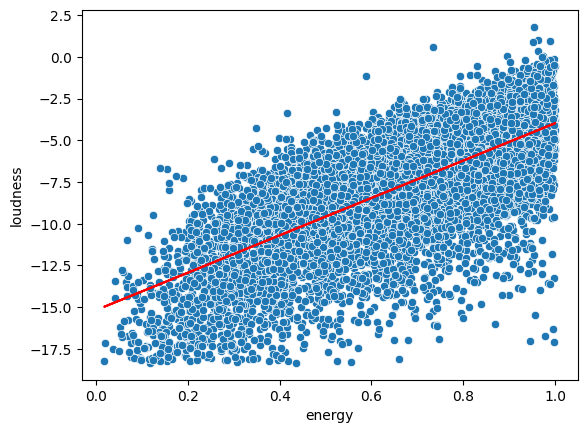

In [15]:
sns.scatterplot(data=train, x="energy", y="loudness")
plt.plot(x_train, reg.coef_[0]*x_train+reg.intercept_, c="red")

In [ ]:
y_pred = reg.predict(X_test)

print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

In [ ]:
sns.scatterplot(data=test, x="energy", y="loudness")
plt.plot(x_test, reg.coef_[0]*x_test+reg.intercept_, c="red")

RIDGE

In [ ]:
reg = Ridge()
reg.fit(x_train, y_train)
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

In [ ]:
sns.scatterplot(data=train, x="energy", y="loudness")
plt.plot(x_train, reg.coef_[0]*x_train+reg.intercept_, c="red")

LASSO

In [ ]:
reg = Lasso()
reg.fit(x_train, y_train)
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

In [ ]:
sns.scatterplot(data=train, x="energy", y="loudness")
plt.plot(x_train, reg.coef_[0]*x_train+reg.intercept_, c="red")

NON LINEAR REGRESSION 


Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
reg = DecisionTreeRegressor()

In [ ]:
reg.fit(x_train, y_train)

In [ ]:
y_pred = reg.predict(x_test)
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

In [ ]:
sns.scatterplot(data=train, x="energy", y="loudness", label="True")
sns.scatterplot(data=train, x="energy", y=reg.predict(x_train), label="Predicted", marker="X")
plt.legend()
plt.show()

KNN REGRESSOR

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
reg = KNeighborsRegressor()

In [ ]:
reg.fit(x_train, y_train)

In [ ]:
y_pred = reg.predict(x_test)
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

In [ ]:
sns.scatterplot(data=train, x="energy", y="loudness", label="True")
sns.scatterplot(data=train, x="energy", y=reg.predict(x_train), label="Predicted", marker="X")
plt.legend()
plt.show()

MULTIPLE REGRESSION

In [ ]:
X_train = train[["loudness", "acousticness"]].values
y_train = train["energy"].values

X_test = test[["loudness", "acousticness"]].values
y_test = test["energy"].values


LINEAR REGRESSION 

In [ ]:
reg = LinearRegression()
reg.fit(X_train, y_train)

In [ ]:
y_pred = reg.predict(X_test)
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

In [ ]:
sns.scatterplot(data=test, x="acousticness", y="energy", label="True")
sns.scatterplot(data=test, x="acousticness", y=reg.predict(X_test), label="Predicted", marker="X")
plt.legend()
plt.show()

NONLINEAR REGRESSION

In [ ]:
reg = DecisionTreeRegressor()

In [ ]:
reg.fit(X_train, y_train)

In [ ]:
y_pred = reg.predict(X_test)
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

In [ ]:
sns.scatterplot(data=test, x="acousticness", y="energy", label="True")
sns.scatterplot(data=test, x="acousticness", y=reg.predict(X_test), label="Predicted", marker="X")
plt.legend()
plt.show()

# Multivariate Regression (2+ target variables)

In [ ]:
'''#use label encoder to encode genre column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_sample['genre'] = le.fit_transform(train_sample['genre'])
train_sample.head()
test_sample['genre'] = le.fit_transform(test_sample['genre'])
test_sample.head(5000)'''

In [ ]:
X_train = train[["danceability","valence","loudness", "acousticness"]].values
y_train = train[["duration_s","energy"]].values

X_test = test[["danceability","valence","loudness", "acousticness"]].values
y_test = test[["duration_s","energy"]].values


In [ ]:
reg = DecisionTreeRegressor()

In [ ]:
reg.fit(X_train, y_train)

In [ ]:
y_pred = reg.predict(X_test)
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

In [ ]:
y_pred = reg.predict(X_test)
y_pred

In [ ]:
sns.scatterplot(data=df_test, x="hue", y="od280/od315_of_diluted_wines", label="True")
sns.scatterplot(data=df_test, x="hue", y=reg.predict(X_test)[:, 0], label="Predicted", marker="X")
plt.legend()
plt.show()

In [ ]:
sns.scatterplot(data=test, x="loudness", y="energy", label="True")
sns.scatterplot(data=test, x="loudness", y=reg.predict(X_test)[:, 0], label="Predicted", marker="X")
plt.legend()
plt.show()

In [ ]:
sns.scatterplot(data=test_sample, x="instrumentalness", y="genre", label="True")
sns.scatterplot(data=test_sample, x="instrumentalness", y=reg.predict(X_test)[:, 0], label="Predicted", marker="X")
plt.legend()
plt.show()